In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-data/train.csv
/kaggle/input/loan-approval-data/test.csv


In [131]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
train = pd.read_csv('/kaggle/input/loan-approval-data/train.csv')
test = pd.read_csv('/kaggle/input/loan-approval-data/test.csv')

# Exploring Data

In [133]:
loan_status = train['loan_status']
train = train.drop(columns='loan_status')

In [134]:
print('train data shape:',train.shape)
print('test data shape:',test.shape)
print('train info:',train.info())
print('test info:',test.info())

train data shape: (58645, 12)
test data shape: (39098, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
dtypes: float64(3), int64(5), obje

In [135]:
train.sample(5)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
14369,14369,26,85000,RENT,0.0,EDUCATION,C,12000,12.99,0.14,Y,2
24729,24729,34,30000,RENT,2.0,MEDICAL,B,7000,10.75,0.23,N,5
42865,42865,22,90000,RENT,1.0,MEDICAL,B,10000,10.99,0.11,N,2
35886,35886,26,55000,RENT,10.0,MEDICAL,B,12000,12.42,0.22,N,4
48906,48906,23,50000,MORTGAGE,3.0,EDUCATION,A,8000,7.88,0.16,N,3


In [136]:
train = train.drop(columns='id')
id = test['id']
test = test.drop(columns='id')

In [137]:
test.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
6803,25,30000,RENT,0.0,EDUCATION,C,3000,12.98,0.10,Y,2
3084,27,48500,RENT,1.0,MEDICAL,A,6000,8.49,0.12,N,5
23112,25,85000,MORTGAGE,9.0,PERSONAL,C,5000,13.98,0.06,Y,4
21834,24,65600,OWN,8.0,EDUCATION,E,7500,17.56,0.11,N,2
10784,22,45000,MORTGAGE,6.0,PERSONAL,C,14750,12.99,0.33,Y,2


In [138]:
train.nunique()

person_age                      53
person_income                 2641
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      545
loan_int_rate                  362
loan_percent_income             61
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [140]:
numeric_columns_train = train.select_dtypes(include=['number']).columns
numeric_columns_test = test.select_dtypes(include=['number']).columns


# Visualising Data

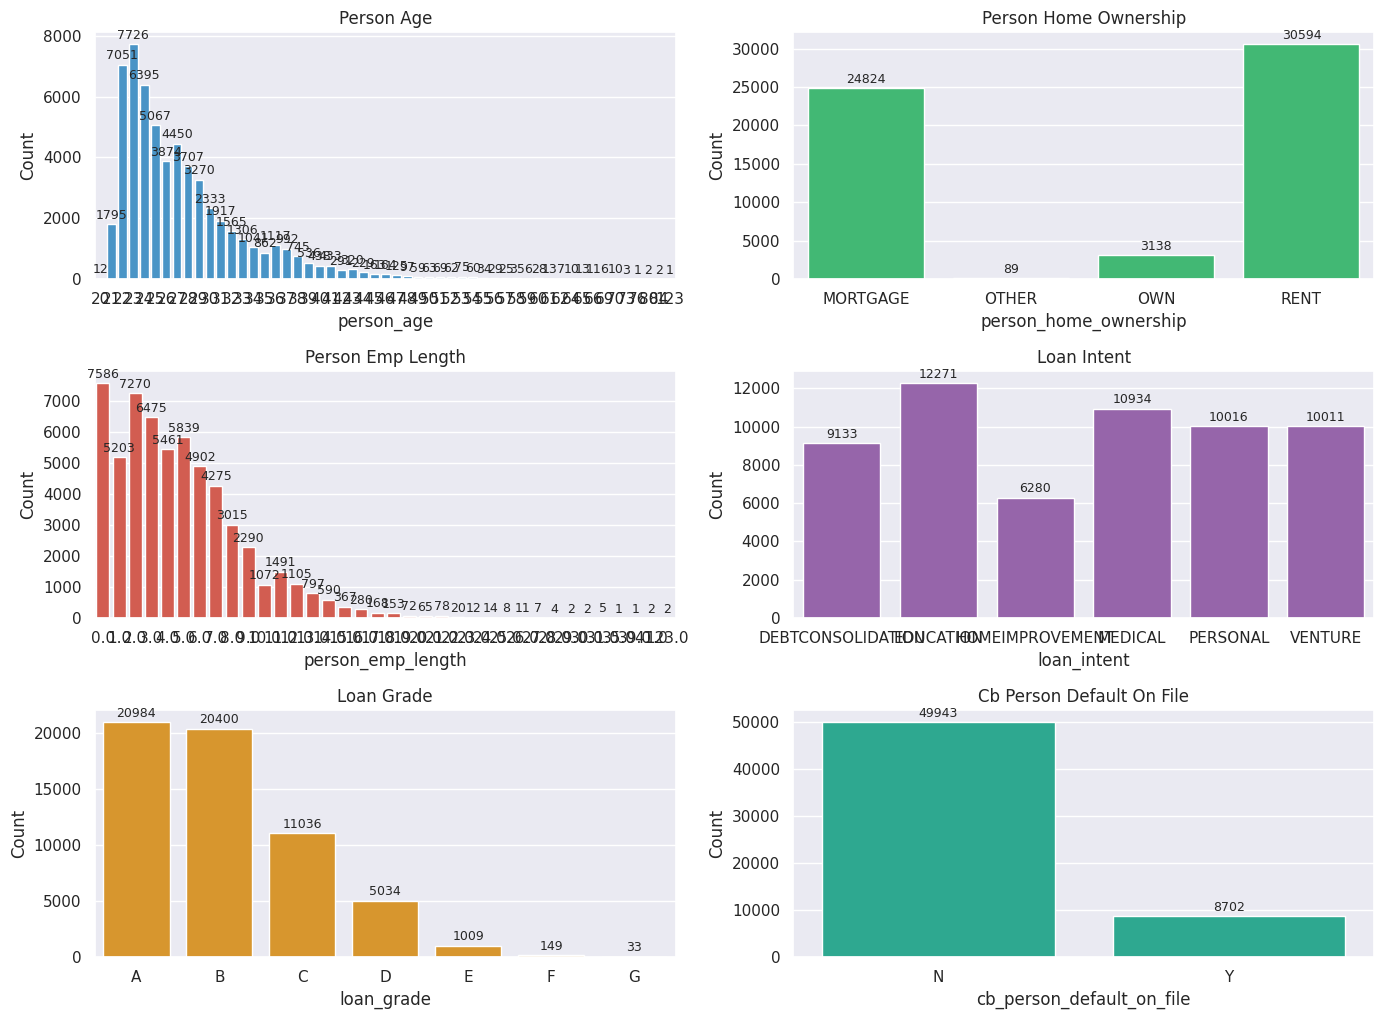

In [141]:
# Set figure size for better readability
plt.figure(figsize=(14, 20))

# Define function to plot bar plots with counts above the bars
def plot_with_counts(data, column, color, position):
    # Calculate value counts
    counts = data[column].value_counts().sort_index()
    # Create a bar plot
    ax = plt.subplot(6, 2, position)
    sns.barplot(x=counts.index, y=counts.values, color=color, ax=ax)
    ax.set_title(column.replace('_', ' ').title())
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    # Annotate each bar with the counts
    for i, count in enumerate(counts.values):
        ax.text(i, count + (max(counts.values) * 0.01), f'{count}', ha='center', va='bottom', fontsize=9)

# Create subplots with distinct colors and annotate with value counts without loops
plot_with_counts(train, 'person_age', '#3498db', 1)  # Blue
plot_with_counts(train, 'person_home_ownership', '#2ecc71', 2)  # Green
plot_with_counts(train, 'person_emp_length', '#e74c3c', 3)  # Red
plot_with_counts(train, 'loan_intent', '#9b59b6', 4)  # Purple
plot_with_counts(train, 'loan_grade', '#f39c12', 5)  # Orange
plot_with_counts(train, 'cb_person_default_on_file', '#1abc9c', 6)  # Teal

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [142]:
train.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [143]:
test.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

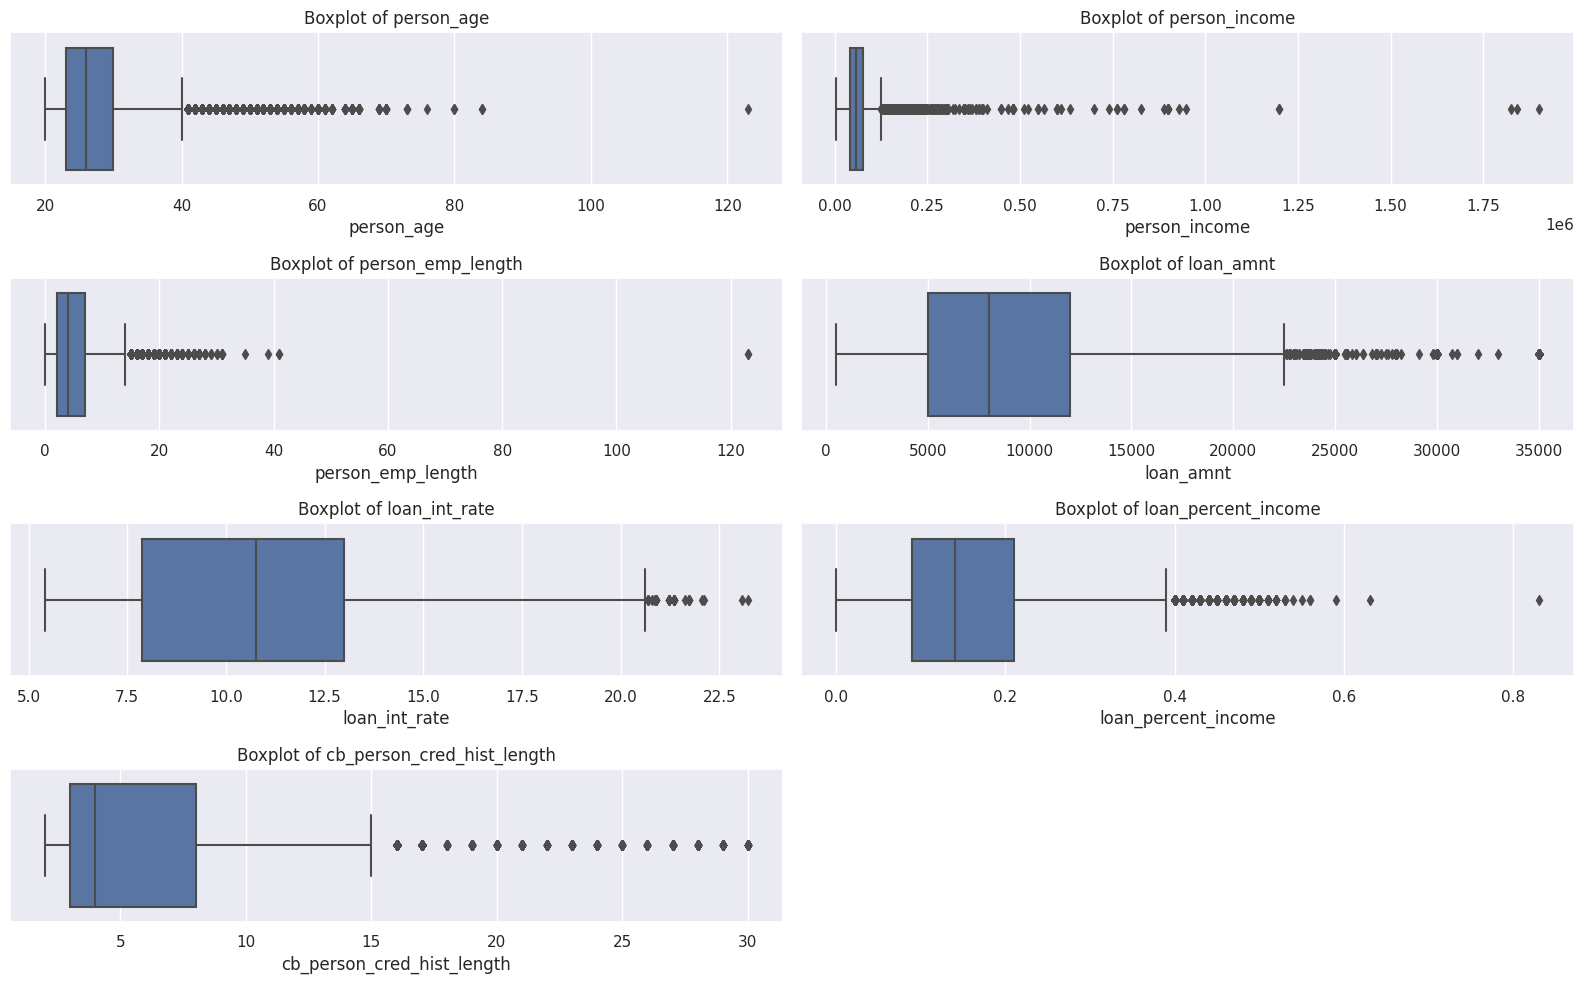

In [144]:
# Select numeric columns only

# Set figure size for better readability
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(numeric_columns_train):
    plt.subplot(len(numeric_columns_train)//2 + 1, 2, i + 1)
    sns.boxplot(x=train[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


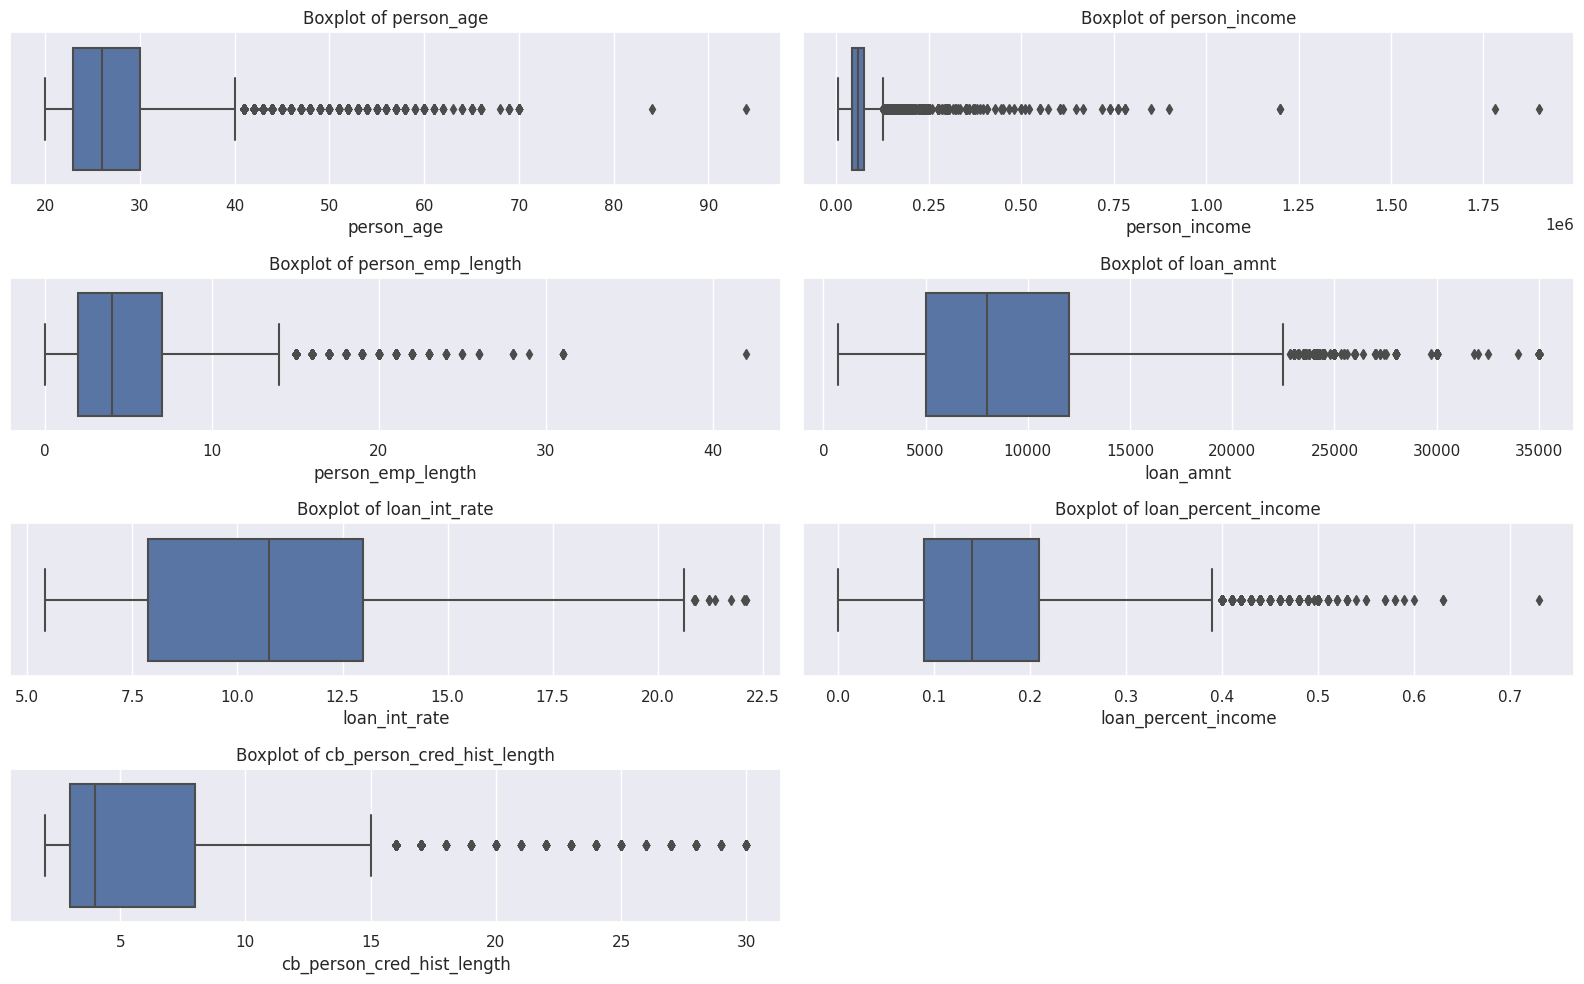

In [145]:
# Set figure size for better readability
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(numeric_columns_test):
    plt.subplot(len(numeric_columns_test)//2 + 1, 2, i + 1)
    sns.boxplot(x=test[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


> Every column contains outliers.

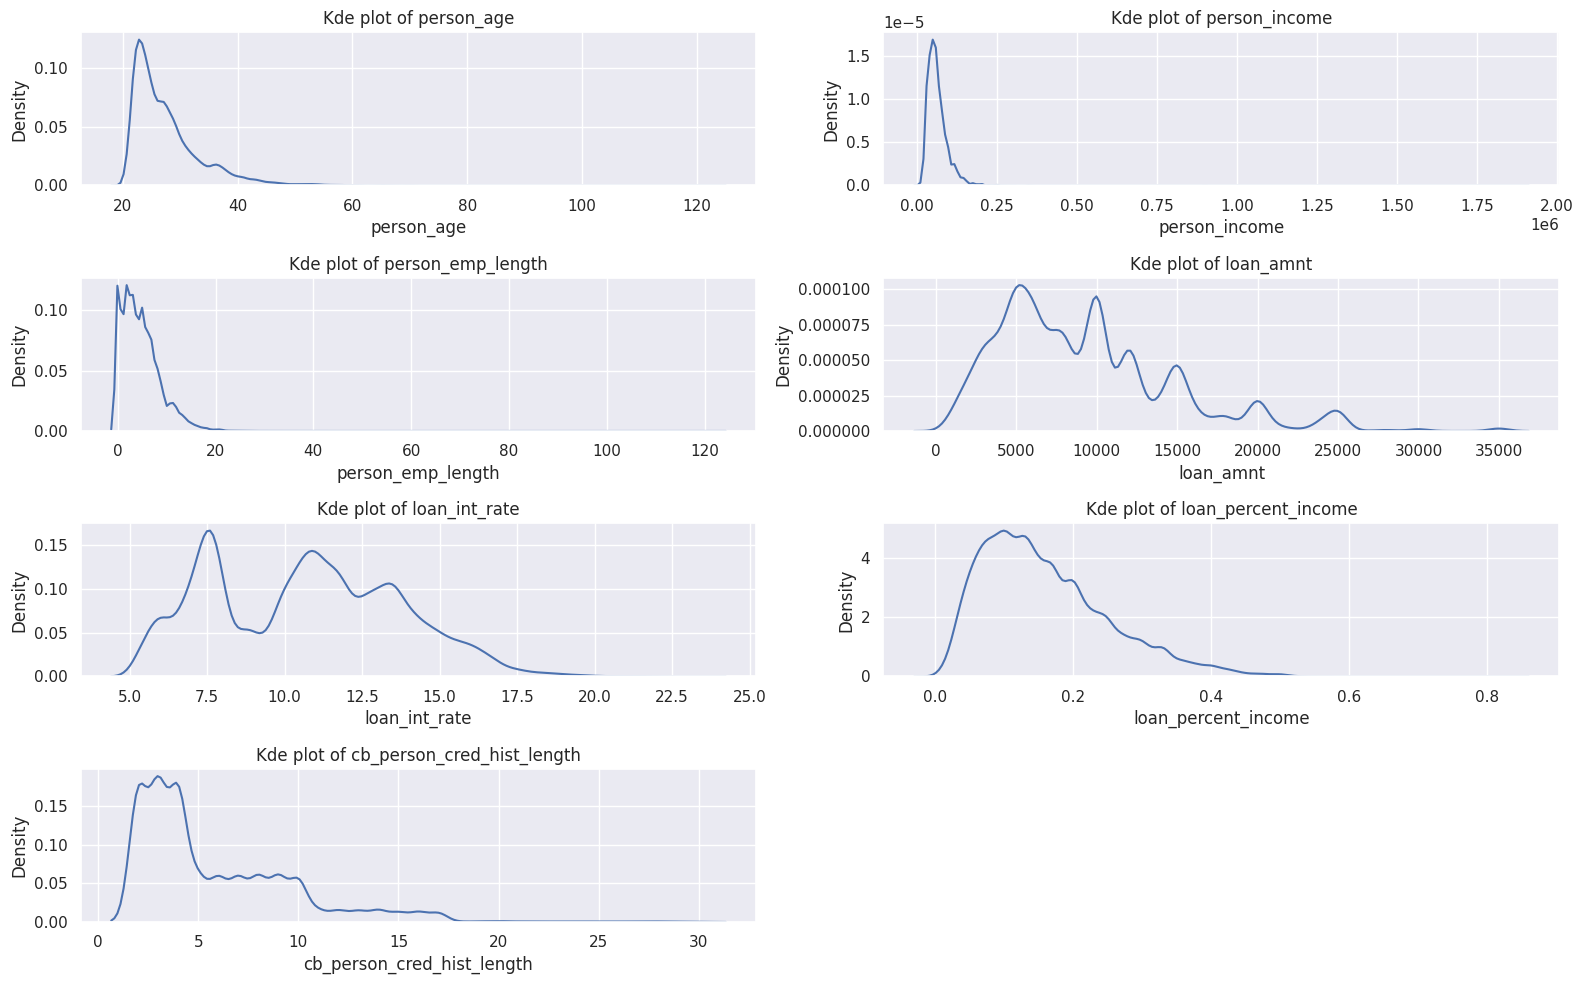

In [146]:
# Set figure size for better readability
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(numeric_columns_train):
    plt.subplot(len(numeric_columns_train)//2 + 1, 2, i + 1)
    sns.kdeplot(x=train[column])
    plt.title(f'Kde plot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


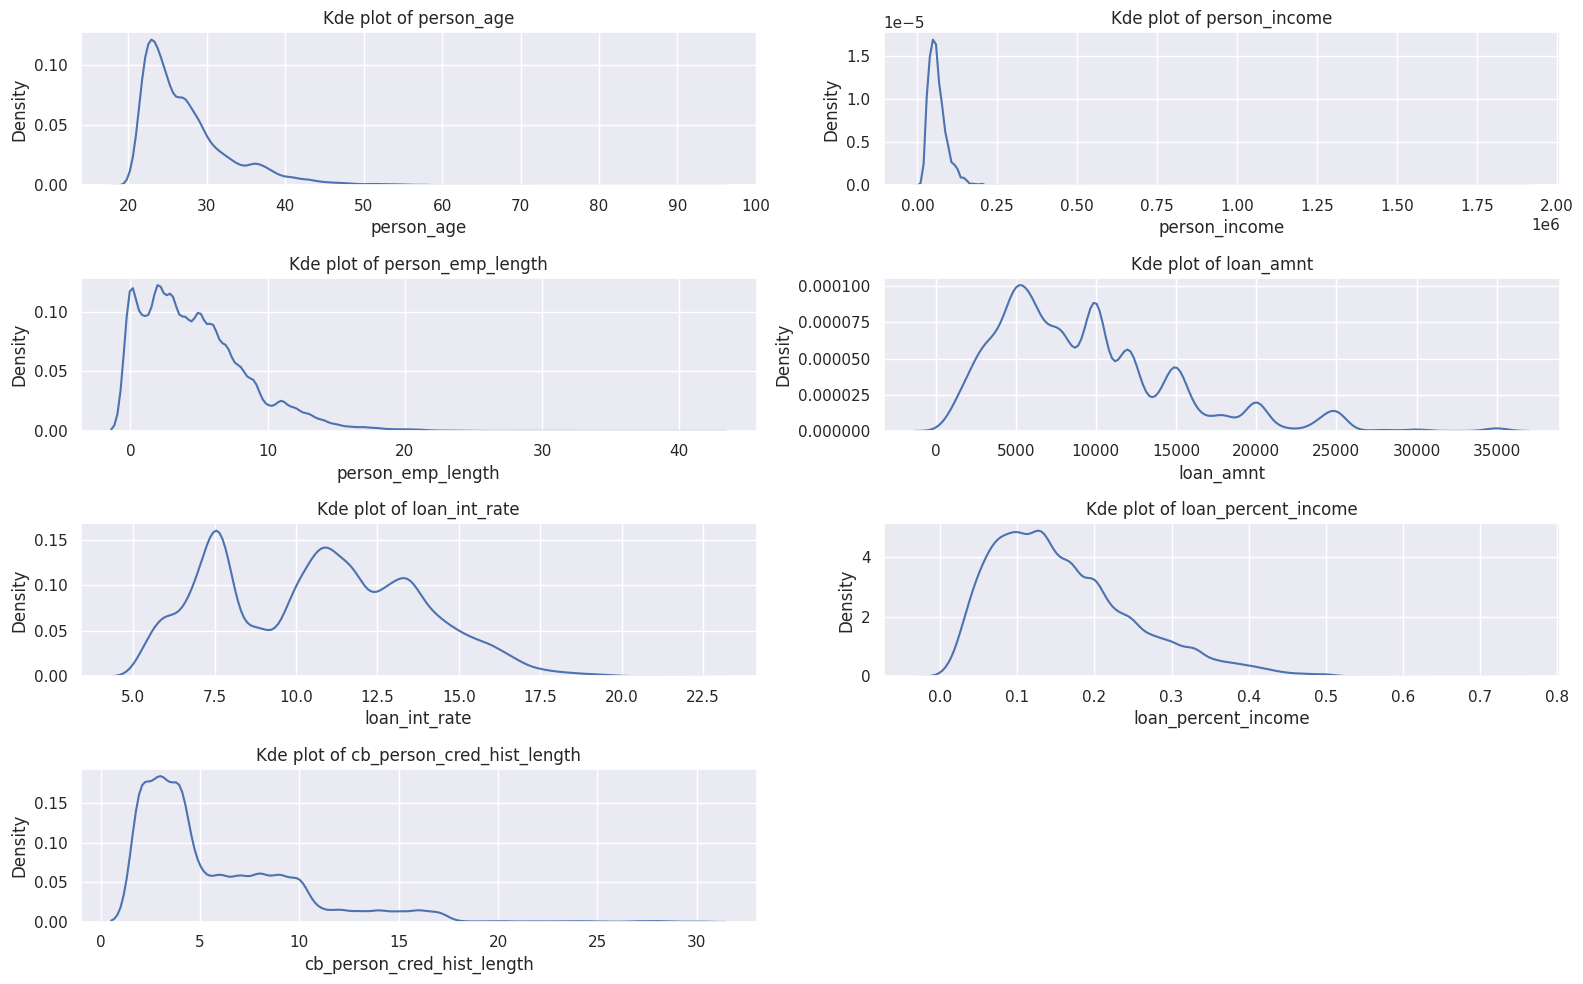

In [147]:
# Set figure size for better readability
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
for i, column in enumerate(numeric_columns_test):
    plt.subplot(len(numeric_columns_test)//2 + 1, 2, i + 1)
    sns.kdeplot(x=test[column])
    plt.title(f'Kde plot of {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [148]:
numeric_columns_corr_train = train.select_dtypes(include=['number'])
numeric_columns_corr_test = test.select_dtypes(include=['number'])


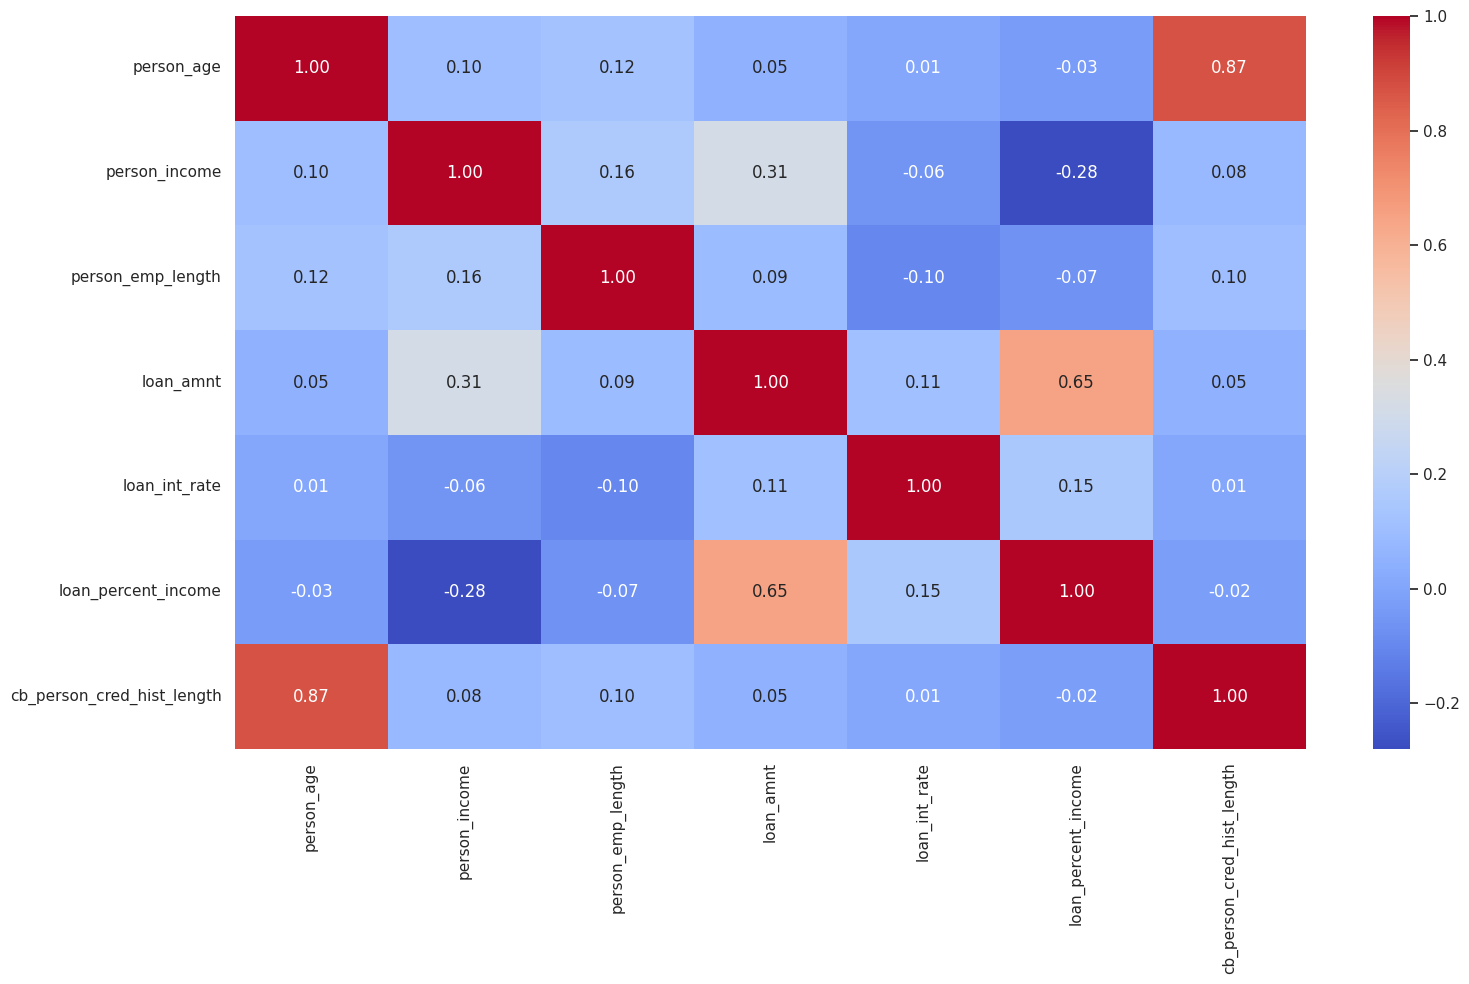

In [149]:
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_columns_corr_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


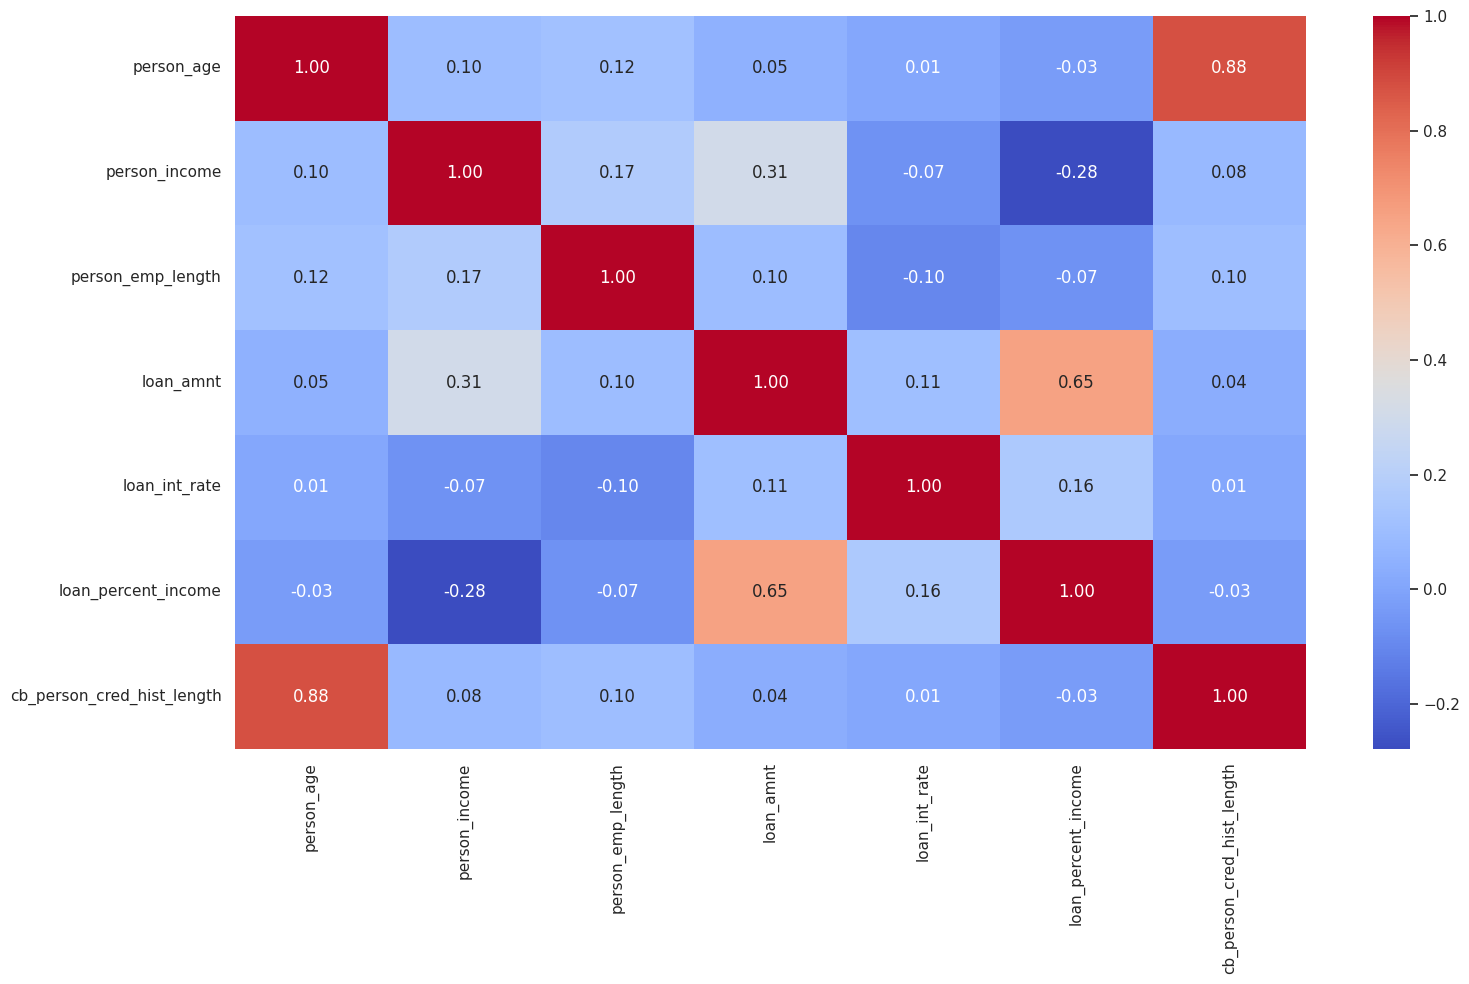

In [150]:
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_columns_corr_test.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


<Figure size 1600x1000 with 0 Axes>

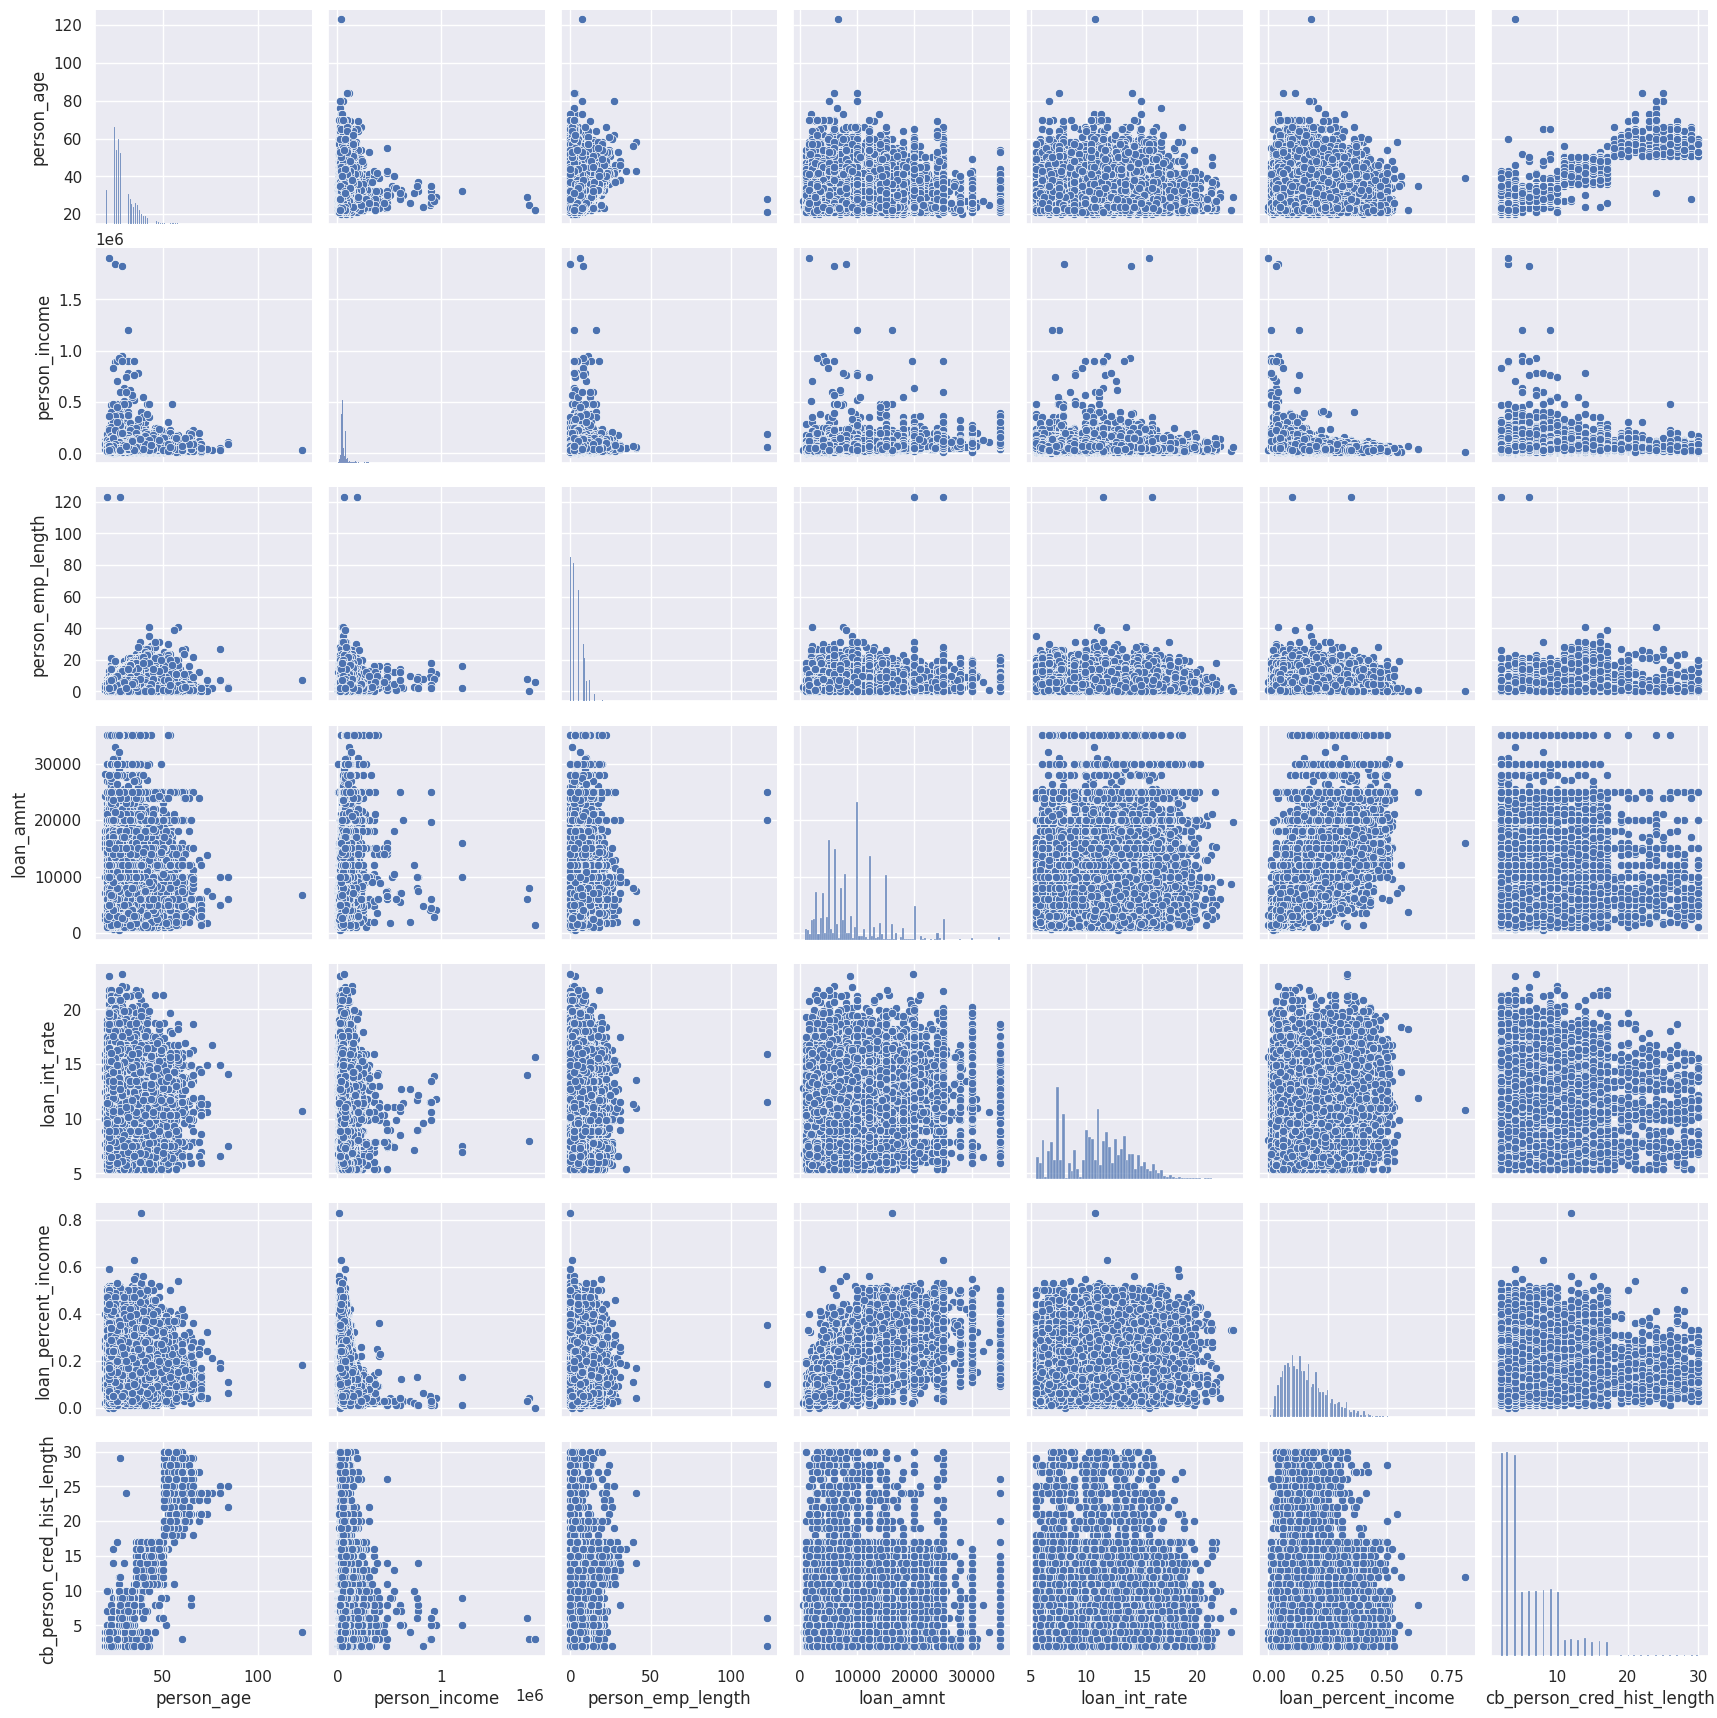

In [151]:
# Set figure size for better readability (optional)
plt.figure(figsize=(16, 10))

# Create a pairplot
sns.pairplot(numeric_columns_corr_train)

# Show the plot
plt.show()


In [152]:
categorical_columns_train = train.select_dtypes(include=['object'])
categorical_columns_test = test.select_dtypes(include=['object'])

# Data Cleaning and Pre-Processing

In [153]:
train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


In [154]:
# Create a copy of the original DataFrame for capping the outliers.
train_capped = train.copy()

# Iterate through each numeric column to find and cap outliers.
for i in numeric_columns_train:
    Q1 = train[i].quantile(0.25)
    Q3 = train[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    print(f'{i}: Upper limit = {upper_limit}')
    print(f'{i}: Lower limit = {lower_limit}')


    # Find outliers above and below the limits.
    outliers_upper = np.where(train[i] > upper_limit)[0]
    outliers_lower = np.where(train[i] < lower_limit)[0]

    # Cap the outliers for the current column.
    train_capped[i] = np.where(
        train_capped[i] > upper_limit,
        upper_limit,
        np.where(
            train_capped[i] < lower_limit,
            lower_limit,
            train_capped[i]
        )
    )


person_age: Upper limit = 40.5
person_age: Lower limit = 12.5
person_income: Upper limit = 126000.0
person_income: Lower limit = -8400.0
person_emp_length: Upper limit = 14.5
person_emp_length: Lower limit = -5.5
loan_amnt: Upper limit = 22500.0
loan_amnt: Lower limit = -5500.0
loan_int_rate: Upper limit = 20.655
loan_int_rate: Lower limit = 0.21499999999999897
loan_percent_income: Upper limit = 0.39
loan_percent_income: Lower limit = -0.09
cb_person_cred_hist_length: Upper limit = 15.5
cb_person_cred_hist_length: Lower limit = -4.5


In [155]:
train_capped

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37.0,35000.0,RENT,0.0,EDUCATION,B,6000.0,11.49,0.17,N,14.0
1,22.0,56000.0,OWN,6.0,MEDICAL,C,4000.0,13.35,0.07,N,2.0
2,29.0,28800.0,OWN,8.0,PERSONAL,A,6000.0,8.90,0.21,N,10.0
3,30.0,70000.0,RENT,14.0,VENTURE,B,12000.0,11.11,0.17,N,5.0
4,22.0,60000.0,RENT,2.0,MEDICAL,A,6000.0,6.92,0.10,N,3.0
...,...,...,...,...,...,...,...,...,...,...,...
58640,34.0,120000.0,MORTGAGE,5.0,EDUCATION,D,22500.0,15.95,0.21,Y,10.0
58641,28.0,28800.0,RENT,0.0,MEDICAL,C,10000.0,12.73,0.35,N,8.0
58642,23.0,44000.0,RENT,7.0,EDUCATION,D,6800.0,16.00,0.15,N,2.0
58643,22.0,30000.0,RENT,2.0,EDUCATION,A,5000.0,8.90,0.17,N,3.0


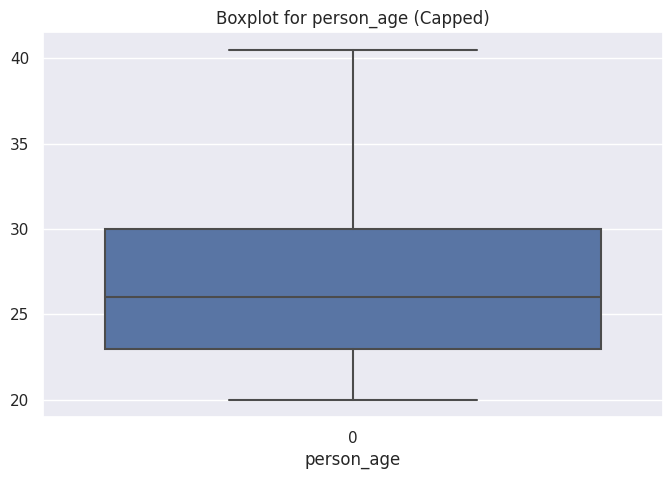

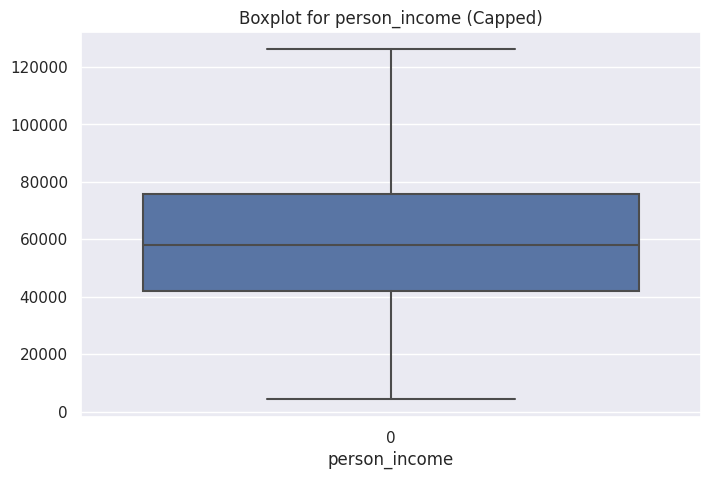

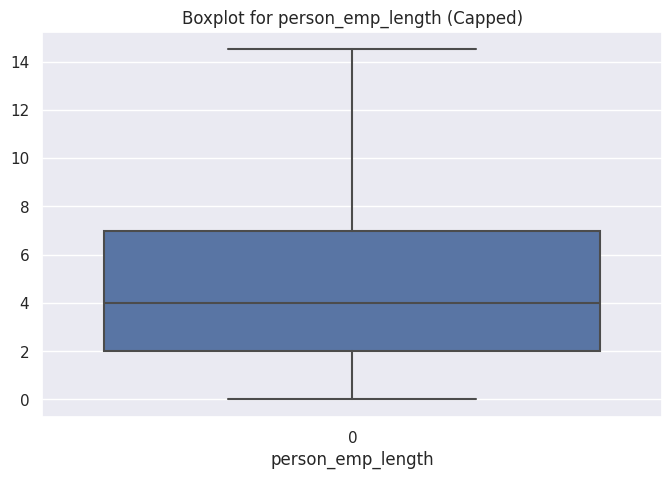

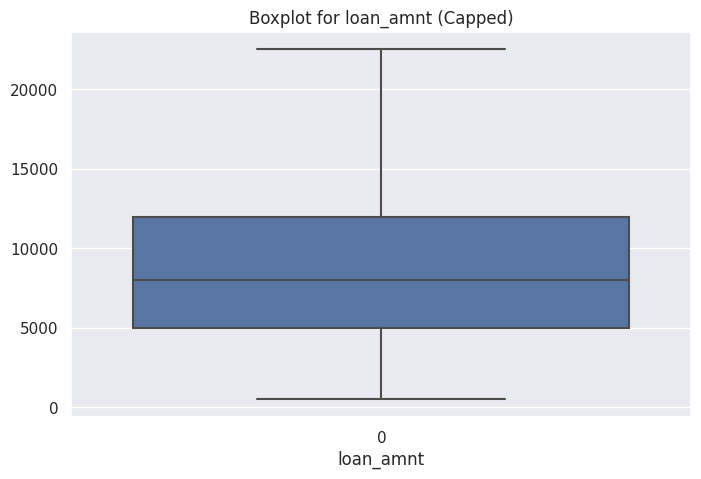

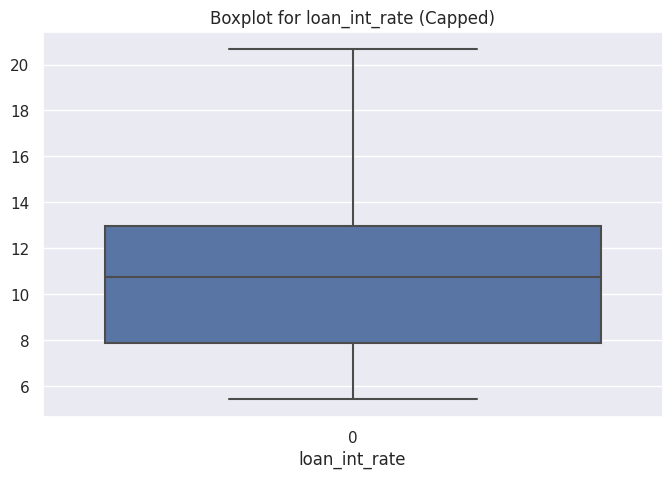

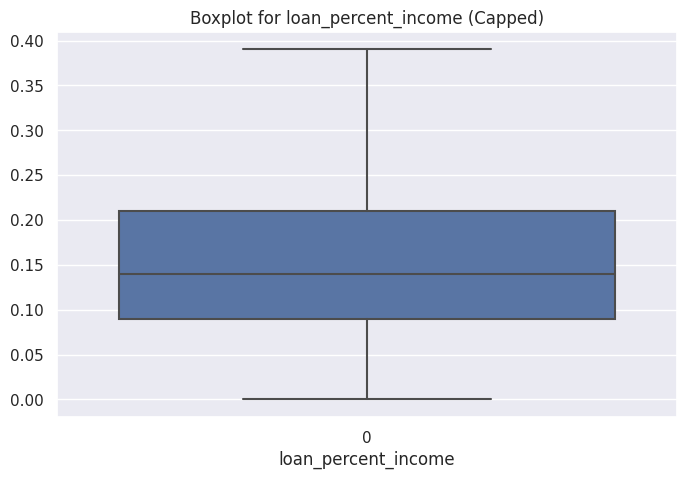

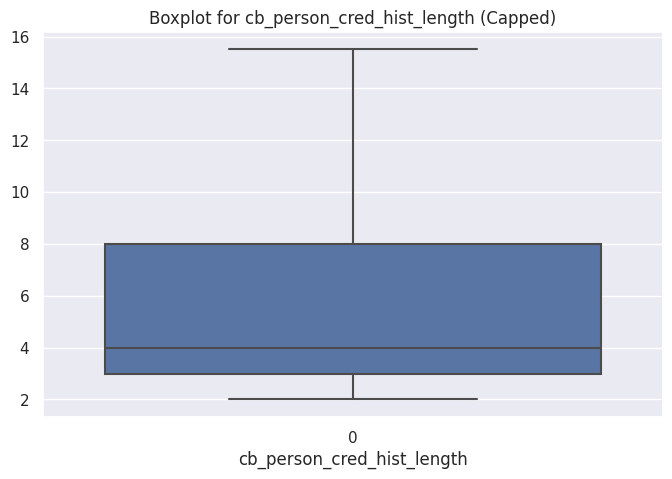

In [156]:
for i in numeric_columns_train:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=train_capped[i])
    plt.title(f'Boxplot for {i} (Capped)')
    plt.xlabel(i)
    plt.show()


In [157]:
# Create a copy of the original DataFrame for capping the outliers.
test_capped = test.copy()

# Iterate through each numeric column to find and cap outliers.
for i in numeric_columns_test:
    Q1 = test[i].quantile(0.25)
    Q3 = test[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    print(f'{i}: Upper limit = {upper_limit}')
    print(f'{i}: Lower limit = {lower_limit}')


    # Find outliers above and below the limits.
    outliers_upper = np.where(test[i] > upper_limit)[0]
    outliers_lower = np.where(test[i] < lower_limit)[0]

    # Cap the outliers for the current column.
    test_capped[i] = np.where(
        test_capped[i] > upper_limit,
        upper_limit,
        np.where(
            test_capped[i] < lower_limit,
            lower_limit,
            test_capped[i]
        )
    )


person_age: Upper limit = 40.5
person_age: Lower limit = 12.5
person_income: Upper limit = 126712.5
person_income: Lower limit = -8827.5
person_emp_length: Upper limit = 14.5
person_emp_length: Lower limit = -5.5
loan_amnt: Upper limit = 22500.0
loan_amnt: Lower limit = -5500.0
loan_int_rate: Upper limit = 20.655
loan_int_rate: Lower limit = 0.21499999999999897
loan_percent_income: Upper limit = 0.39
loan_percent_income: Lower limit = -0.09
cb_person_cred_hist_length: Upper limit = 15.5
cb_person_cred_hist_length: Lower limit = -4.5


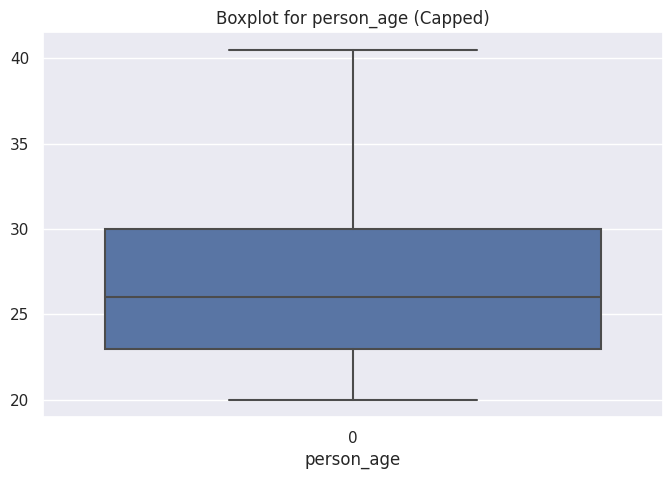

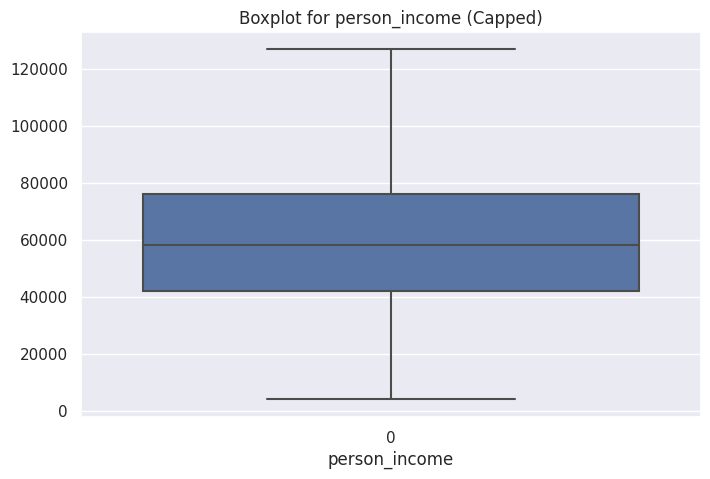

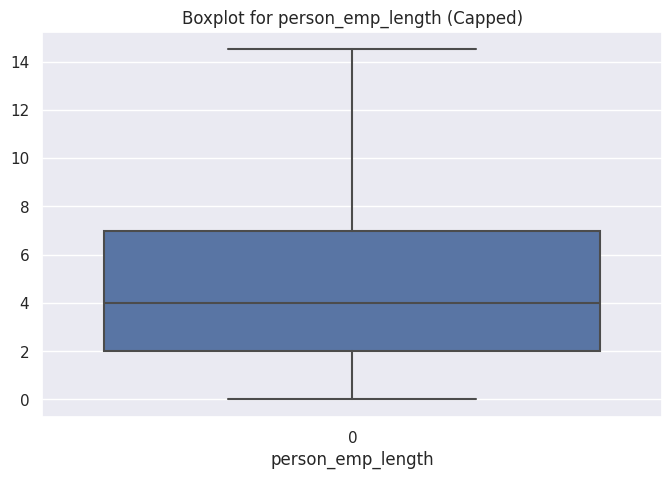

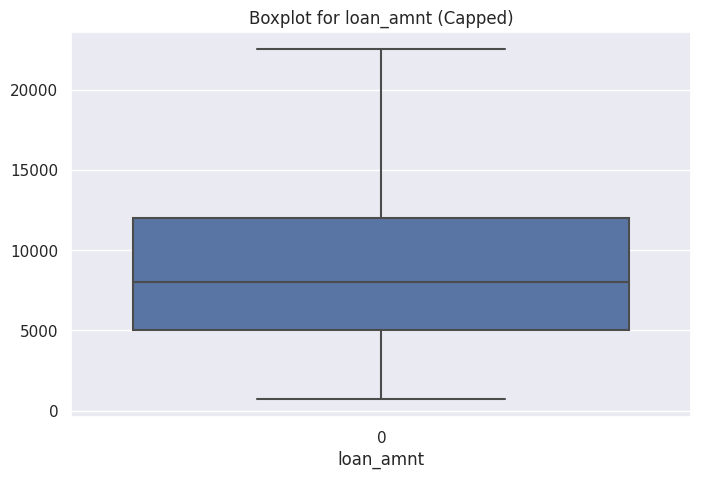

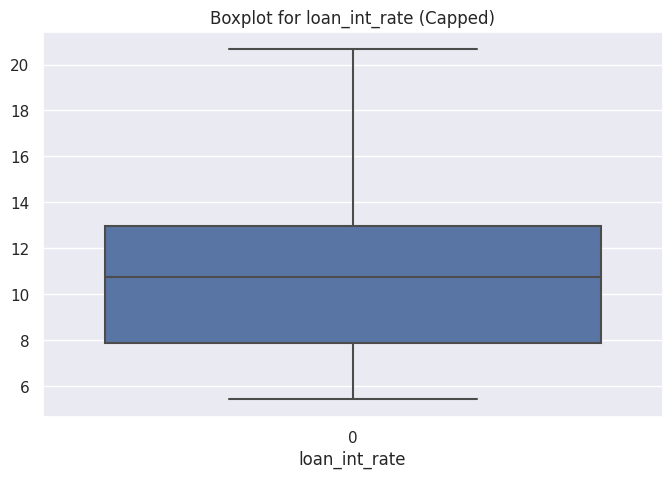

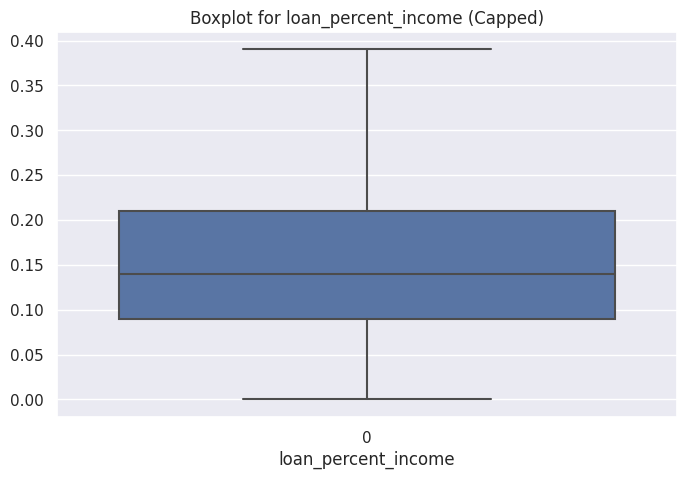

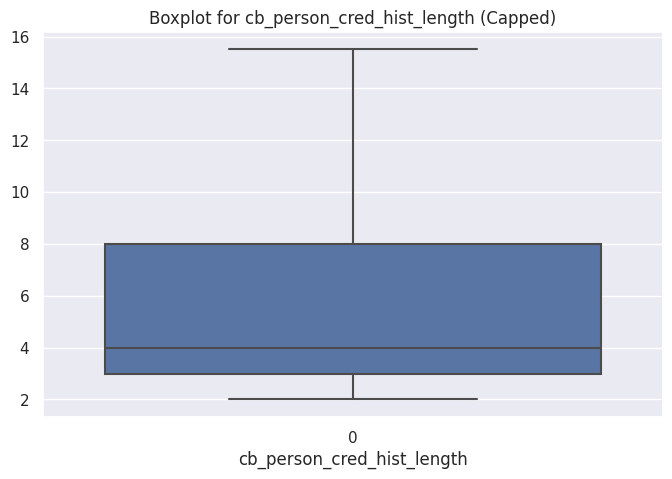

In [158]:
for i in numeric_columns_test:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=test_capped[i])
    plt.title(f'Boxplot for {i} (Capped)')
    plt.xlabel(i)
    plt.show()


Done with outliers
    

In [159]:
train_capped.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.304664,62216.788780,4.633797,9100.847932,10.677471,0.158317,5.719882
std,5.188846,26678.542535,3.684211,5209.396126,3.033293,0.088955,3.702970
min,20.000000,4200.000000,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,42000.000000,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,26.000000,58000.000000,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,30.000000,75600.000000,7.000000,12000.000000,12.990000,0.210000,8.000000
max,40.500000,126000.000000,14.500000,22500.000000,20.655000,0.390000,15.500000


In [160]:
test_capped.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,27.316538,62273.034452,4.626068,9129.844877,10.661008,0.158610,5.729756
std,5.177726,26628.420638,3.662336,5205.433935,3.019495,0.088749,3.721346
min,20.000000,4000.000000,0.000000,700.000000,5.420000,0.000000,2.000000
25%,23.000000,42000.000000,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,26.000000,58000.000000,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,30.000000,75885.000000,7.000000,12000.000000,12.990000,0.210000,8.000000
max,40.500000,126712.500000,14.500000,22500.000000,20.655000,0.390000,15.500000


In [161]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [162]:
train_capped.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37.0,35000.0,RENT,0.0,EDUCATION,B,6000.0,11.49,0.17,N,14.0
1,22.0,56000.0,OWN,6.0,MEDICAL,C,4000.0,13.35,0.07,N,2.0
2,29.0,28800.0,OWN,8.0,PERSONAL,A,6000.0,8.90,0.21,N,10.0
3,30.0,70000.0,RENT,14.0,VENTURE,B,12000.0,11.11,0.17,N,5.0
4,22.0,60000.0,RENT,2.0,MEDICAL,A,6000.0,6.92,0.10,N,3.0


In [163]:
train_capped.select_dtypes(include=['object'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,B,N
1,OWN,MEDICAL,C,N
2,OWN,PERSONAL,A,N
3,RENT,VENTURE,B,N
4,RENT,MEDICAL,A,N
...,...,...,...,...
58640,MORTGAGE,EDUCATION,D,Y
58641,RENT,MEDICAL,C,N
58642,RENT,EDUCATION,D,N
58643,RENT,EDUCATION,A,N


In [164]:
train_capped.select_dtypes(include=['object']).nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [165]:
train_capped.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [166]:
ohe = OneHotEncoder(sparse_output=False,drop='first')
oe = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']])
scale = StandardScaler()

In [167]:
clf = ColumnTransformer(transformers=[
    ('tf1',ohe,['person_home_ownership','loan_intent','cb_person_default_on_file']),
    ('tf2',oe,['loan_grade']),
    ('tf3',scale,['person_income','loan_amnt'])
],remainder='passthrough')

In [168]:
train_trf = clf.fit_transform(train_capped)
test_trf = clf.fit_transform(test_capped)

In [169]:
print(train_trf.shape)  # This should print (58645, 18)
print(len(clf.get_feature_names_out()))  # This should also print 18


(58645, 17)
17


In [170]:
train_trf = pd.DataFrame(train_trf, columns=clf.get_feature_names_out())
test_trf = pd.DataFrame(test_trf, columns=clf.get_feature_names_out())

In [171]:
train_trf.corr()

,tf1__person_home_ownership_OTHER,tf1__person_home_ownership_OWN,tf1__person_home_ownership_RENT,tf1__loan_intent_EDUCATION,tf1__loan_intent_HOMEIMPROVEMENT,tf1__loan_intent_MEDICAL,tf1__loan_intent_PERSONAL,tf1__loan_intent_VENTURE,tf1__cb_person_default_on_file_Y,tf2__loan_grade,tf3__person_income,tf3__loan_amnt,remainder__person_age,remainder__person_emp_length,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length
tf1__person_home_ownership_OTHER,1.000000,-0.009270,-0.040715,-0.001747,0.000665,-0.010790,0.009079,0.007925,0.002210,0.007147,0.004253,0.006103,-0.004484,-0.003437,0.011360,0.002412,-0.002019
tf1__person_home_ownership_OWN,-0.009270,1.000000,-0.248311,0.007153,0.008323,-0.022774,0.004844,0.093910,0.004342,-0.001457,-0.061200,-0.020675,0.005497,0.018307,0.002339,0.029865,0.007899
tf1__person_home_ownership_RENT,-0.040715,-0.248311,1.000000,0.013045,-0.068571,0.081507,-0.023508,-0.043145,0.095962,0.180806,-0.332693,-0.103863,-0.058642,-0.300635,0.198985,0.146290,-0.051491
tf1__loan_intent_EDUCATION,-0.001747,0.007153,0.013045,1.000000,-0.178140,-0.246254,-0.233454,-0.233384,0.005681,-0.006841,-0.021286,-0.015297,-0.134382,-0.037086,0.000648,-0.002542,-0.108506
tf1__loan_intent_HOMEIMPROVEMENT,0.000665,0.008323,-0.068571,-0.178140,1.000000,-0.165783,-0.157166,-0.157119,0.022051,0.032760,0.114371,0.063148,0.114843,0.035485,0.023269,-0.020873,0.094991
tf1__loan_intent_MEDICAL,-0.010790,-0.022774,0.081507,-0.246254,-0.165783,1.000000,-0.217260,-0.217195,-0.003625,0.008595,-0.082999,-0.035271,0.024612,-0.024284,0.010294,0.023823,0.015700
tf1__loan_intent_PERSONAL,0.009079,0.004844,-0.023508,-0.233454,-0.157166,-0.217260,1.000000,-0.205906,-0.000920,-0.008855,0.010280,0.001402,0.046457,0.022026,-0.010614,-0.002977,0.046507
tf1__loan_intent_VENTURE,0.007925,0.093910,-0.043145,-0.233384,-0.157119,-0.217195,-0.205906,1.000000,-0.011662,-0.011615,0.009423,0.004350,-0.007974,0.012683,-0.011066,-0.000439,-0.006483
tf1__cb_person_default_on_file_Y,0.002210,0.004342,0.095962,0.005681,0.022051,-0.003625,-0.000920,-0.011662,1.000000,0.550677,-0.044618,0.018868,0.003567,-0.058041,0.501871,0.043353,0.002780
tf2__loan_grade,0.007147,-0.001457,0.180806,-0.006841,0.032760,0.008595,-0.008855,-0.011615,0.550677,1.000000,-0.076181,0.112175,0.013763,-0.097949,0.935740,0.153911,0.010484


In [172]:
test_trf.corr()

,tf1__person_home_ownership_OTHER,tf1__person_home_ownership_OWN,tf1__person_home_ownership_RENT,tf1__loan_intent_EDUCATION,tf1__loan_intent_HOMEIMPROVEMENT,tf1__loan_intent_MEDICAL,tf1__loan_intent_PERSONAL,tf1__loan_intent_VENTURE,tf1__cb_person_default_on_file_Y,tf2__loan_grade,tf3__person_income,tf3__loan_amnt,remainder__person_age,remainder__person_emp_length,remainder__loan_int_rate,remainder__loan_percent_income,remainder__cb_person_cred_hist_length
tf1__person_home_ownership_OTHER,1.000000,-0.010601,-0.046711,-0.003261,-0.004615,0.004283,-0.013167,0.010016,0.006597,0.013764,-0.005240,0.009880,-0.015071,-0.016946,0.016868,0.014824,-0.013645
tf1__person_home_ownership_OWN,-0.010601,1.000000,-0.244575,-0.000193,-0.000940,-0.011850,0.002304,0.095032,0.004577,0.006179,-0.046686,-0.010822,0.015330,0.019393,0.011307,0.029280,0.014076
tf1__person_home_ownership_RENT,-0.046711,-0.244575,1.000000,0.014289,-0.066740,0.083988,-0.025626,-0.047601,0.085796,0.179916,-0.329495,-0.107006,-0.056258,-0.292598,0.199398,0.142497,-0.050428
tf1__loan_intent_EDUCATION,-0.003261,-0.000193,0.014289,1.000000,-0.177313,-0.247491,-0.234428,-0.230606,-0.007729,-0.009336,-0.020827,-0.015459,-0.134679,-0.028656,-0.003564,-0.004419,-0.111457
tf1__loan_intent_HOMEIMPROVEMENT,-0.004615,-0.000940,-0.066740,-0.177313,1.000000,-0.168567,-0.159670,-0.157067,0.017866,0.034823,0.113949,0.061602,0.116250,0.041237,0.024712,-0.026151,0.096457
tf1__loan_intent_MEDICAL,0.004283,-0.011850,0.083988,-0.247491,-0.168567,1.000000,-0.222866,-0.219232,-0.003875,-0.001616,-0.082651,-0.033057,0.021829,-0.021357,0.001658,0.026435,0.017967
tf1__loan_intent_PERSONAL,-0.013167,0.002304,-0.025626,-0.234428,-0.159670,-0.222866,1.000000,-0.207660,-0.006294,-0.007897,0.006920,0.000935,0.036404,0.013592,-0.006581,-0.000874,0.035622
tf1__loan_intent_VENTURE,0.010016,0.095032,-0.047601,-0.230606,-0.157067,-0.219232,-0.207660,1.000000,-0.002837,-0.011896,0.019186,0.002009,-0.002761,0.016206,-0.010684,-0.009917,-0.003356
tf1__cb_person_default_on_file_Y,0.006597,0.004577,0.085796,-0.007729,0.017866,-0.003875,-0.006294,-0.002837,1.000000,0.556307,-0.051681,0.022437,0.012613,-0.058047,0.505660,0.056447,0.005033
tf2__loan_grade,0.013764,0.006179,0.179916,-0.009336,0.034823,-0.001616,-0.007897,-0.011896,0.556307,1.000000,-0.079816,0.106351,0.013238,-0.094989,0.934359,0.155314,0.008634


In [173]:
train_trf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tf1__person_home_ownership_OTHER       58645 non-null  float64
 1   tf1__person_home_ownership_OWN         58645 non-null  float64
 2   tf1__person_home_ownership_RENT        58645 non-null  float64
 3   tf1__loan_intent_EDUCATION             58645 non-null  float64
 4   tf1__loan_intent_HOMEIMPROVEMENT       58645 non-null  float64
 5   tf1__loan_intent_MEDICAL               58645 non-null  float64
 6   tf1__loan_intent_PERSONAL              58645 non-null  float64
 7   tf1__loan_intent_VENTURE               58645 non-null  float64
 8   tf1__cb_person_default_on_file_Y       58645 non-null  float64
 9   tf2__loan_grade                        58645 non-null  float64
 10  tf3__person_income                     58645 non-null  float64
 11  tf

# Model Building

> Building Model on the train data to avoid overfitting.

> Results:
1. *Logistic Regression*:
   * Cross-validation accuracy scores: (0.8993094  0.89896837 0.90058829 0.89751897 0.89521698)   * 
Mean accuracy score: 0.898
   * Standard deviation of accuracy scores: 0.0018
     
2. *Decision Tree Classifier*:
   * Cross-validation accuracy scores: (0.91056356 0.9191747  0.90996675 0.91167192 0.91081934)
   * Mean accuracy score: 0.9124
   * Standard deviation of accuracy scores: 0.0034
     
3. *Gradient Boosting Classifier*:
   * Cross-validation accuracy scores: (0.94765112 0.94586069 0.9479069  0.94969733 0.94381448)
   * Mean accuracy score: 0.9470
   * Standard deviation of accuracy scores: 0.0020
     
4. *RandomForestClassifier*:
   * Cross-validation accuracy scores: (0.95208458 0.94910052 0.9508057  0.95361923 0.94927104)
   * Mean accuracy score: 0.9510
   * Standard deviation of accuracy scores: 0.00170

4318

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score ,KFold

In [175]:
x = train_trf
y = loan_status

In [176]:
print(x.shape)
print(y.shape)

(58645, 17)
(58645,)


In [177]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=365)

In [178]:
print("Unique classes in y_train:", np.unique(y_train))



Unique classes in y_train: [0 1]


In [179]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = GradientBoostingClassifier()
model4 = RandomForestClassifier()

In [192]:
# Logistic Regression
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred1))


Accuracy Score: 0.8999914741239662


In [181]:
# Decision Tree
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred2))


Accuracy Score: 0.910734077926507


In [190]:
# Gradient Boosting
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred3))


Accuracy Score: 0.9468837923096598


In [183]:
# Random Forest
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred4))


Accuracy Score: 0.9509762128058658


In [184]:
model1 = LogisticRegression()

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model1, x, y, cv=kf, scoring='accuracy')

# Print cross-validation results
print("Cross-validation accuracy scores:", cv_scores)
print(f"Mean accuracy score: {cv_scores.mean():.4f}")
print(f"Standard deviation of accuracy scores: {cv_scores.std():.4f}")


Cross-validation accuracy scores: [0.8993094  0.89896837 0.90058829 0.89751897 0.89521698]
Mean accuracy score: 0.8983
Standard deviation of accuracy scores: 0.0018


In [185]:
model2 = DecisionTreeClassifier()

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model2, x, y, cv=kf, scoring='accuracy')

# Print cross-validation results
print("Cross-validation accuracy scores:", cv_scores)
print(f"Mean accuracy score: {cv_scores.mean():.4f}")
print(f"Standard deviation of accuracy scores: {cv_scores.std():.4f}")


Cross-validation accuracy scores: [0.91175718 0.91712848 0.91064882 0.91218348 0.9104783 ]
Mean accuracy score: 0.9124
Standard deviation of accuracy scores: 0.0024


In [186]:
model3 = GradientBoostingClassifier()

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model3, x, y, cv=kf, scoring='accuracy')

# Print cross-validation results
print("Cross-validation accuracy scores:", cv_scores)
print(f"Mean accuracy score: {cv_scores.mean():.4f}")
print(f"Standard deviation of accuracy scores: {cv_scores.std():.4f}")


Cross-validation accuracy scores: [0.94765112 0.94586069 0.9479069  0.94969733 0.94381448]
Mean accuracy score: 0.9470
Standard deviation of accuracy scores: 0.0020


In [187]:
model4 = RandomForestClassifier()

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model4, x, y, cv=kf, scoring='accuracy')

# Print cross-validation results
print("Cross-validation accuracy scores:", cv_scores)
print(f"Mean accuracy score: {cv_scores.mean():.4f}")
print(f"Standard deviation of accuracy scores: {cv_scores.std():.4f}")

Cross-validation accuracy scores: [0.95259613 0.95003837 0.9508057  0.95353398 0.9493563 ]
Mean accuracy score: 0.9513
Standard deviation of accuracy scores: 0.0016


I tried and tested for each algorithm, gradient boost is giving the best score at the end.

# Preparing for submission

In [188]:
test_trf.columns

Index(['tf1__person_home_ownership_OTHER', 'tf1__person_home_ownership_OWN',
       'tf1__person_home_ownership_RENT', 'tf1__loan_intent_EDUCATION',
       'tf1__loan_intent_HOMEIMPROVEMENT', 'tf1__loan_intent_MEDICAL',
       'tf1__loan_intent_PERSONAL', 'tf1__loan_intent_VENTURE',
       'tf1__cb_person_default_on_file_Y', 'tf2__loan_grade',
       'tf3__person_income', 'tf3__loan_amnt', 'remainder__person_age',
       'remainder__person_emp_length', 'remainder__loan_int_rate',
       'remainder__loan_percent_income',
       'remainder__cb_person_cred_hist_length'],
      dtype='object')

In [194]:
predictions = model3.predict(test_trf)  # Use predict() method instead of calling the model

# Assuming 'id' is defined; you need to ensure it has the same length as predictions
output = pd.DataFrame({'id': id, 'loan_status': predictions})

# Save the output to a CSV file
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
